<a href="https://colab.research.google.com/github/Kaleem-ahmad/learn_agentic/blob/main/customerservice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U -q langchain langgraph langchain_google_genai  langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 855.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 1.9 MB/s eta 0:00:00


In [11]:
import os
from google.colab import userdata

from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
# reducer funion:
from langgraph.graph import add_messages

os.environ['GOOGLE_API_KEY'] = userdata.get('GOOGLE_API_KEY')
os.environ["GEMINI_API_KEY"] = userdata.get("GEMINI_API_KEY")
os.environ["TAVILY_API_KEY"] = userdata.get("TAVILY_API_KEY")
os.environ["LANGCHAIN_TRACING_V2"] = "true"

LANGCHAIN_TRACING_V2="true"
LLM_MODEL = userdata.get("GEMINI_BASE_MODEL")
LLM_MODEL_CONFIG = userdata.get("LLM_CON_FIG")
TAVILY_API_KEY = userdata.get("TAVILY_API_KEY")
LANGCHAIN_API_KEY=os.environ.get('LANGCHAIN_API_KEY')
LANGCHAIN_PROJECT=os.environ.get('LANGCHAIN_PROJECT')

In [26]:
from langchain_google_genai import ChatGoogleGenerativeAI

global_llm : ChatGoogleGenerativeAI= ChatGoogleGenerativeAI(
      model =LLM_MODEL,
      api_key =os.environ.get('GEMINI_API_KEY'),
      config =LLM_MODEL_CONFIG,
      max_retries =2,
)

# global_llm.invoke("Hi, give me some basic prompt on customer services in medical field?")

prompts : str= """
                    AIMessage(content=`Here are some basic prompts for customer service in the medical field, categorized for clarity:
                    \n\n**Appointment Scheduling & Management:**\n\n* I need to reschedule my appointment for [procedure/doctor].\n*
                    How do I book an appointment with Dr. [Doctor\'s Name]? \n* What are the available appointment times for a [type of appointment] next week?
                    \n* "I missed my appointment, what are the options?"\n*
                    "Can I get a reminder call for my upcoming appointment?"\n\n**
                    Billing & Insurance:**\n\n*
                    "I received a bill I don\'t understand. Can you help me?"\n*
                    "What is my current balance?"\n* "My insurance information has changed. How do I update it?"\n*
                    "How do I submit a claim to my insurance company?"\n*
                    "I have a question about the payment options."
                    \n\n**General Inquiries & Information:**\n\n*
                    "What are your office hours?"\n* "What is your address and phone number?"\n*
                    "I need directions to your facility."\n*
                    "Who do I contact for [specific department/information]?"\n*
                    "What forms of payment do you accept?"\n\n**
                    Specific Medical Concerns (Use with caution - avoid giving medical advice):**\n\n*
                    "I have a question about the results of my recent test." (This should direct them to a proper channel for results.)\n*
                    "I\'m experiencing [symptom].  Should I come in?" (This should prompt them to describe the symptom and be directed appropriately,
                    never receive a diagnosis.)\n* "I have a question about my medication."
                    (Should direct them to the pharmacist or their doctor.)\n\n\n**Remember**:
                    These prompts should always be followed by a polite and professional response from the customer service representative.
                    They should never attempt to diagnose or treat medical conditions.
                    Their role is to guide the patient to the appropriate resources and information.\n',
                    additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []},
                    'finish_reason': 'STOP', 'safety_ratings': []}, id='run-5f576356-e253-4d43-9bef-46080e196019-0',
                    usage_metadata={'input_tokens': 15, 'output_tokens': 393, 'total_tokens': 408, 'input_token_details': {'cache_read': 0}})`

                  """
# Private date to store messages in my State class variable
class State ( TypedDict ):
    messages : Annotated [list, add_messages]


def chatbot ( state: State):
    return {"messages": [global_llm.invoke(state["messages"])]}

# Basic interface designer manager:
# (hard code binded) with our private data

Builder = StateGraph (State)

# variable<node> : to storage functional  data
Builder.add_node ("chatbot" , chatbot)

# Business log (flow of work: managment through add_edge)
Builder.add_edge ( START , "chatbot")
Builder.add_edge ("chatbot" , END)
# will help you to design a default graph as an output
# Builder.compile()
# Now store this work process : in a variable to
# maintain further for future queries
vG = Builder.compile()

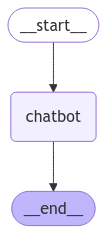

In [27]:
# test case to check/analyse/verifies the data
#  log to view how the workflow is behaving...
from IPython.display import Image, display
try:
    # display(Image(global_llm.get_graph().draw_mermaid_png()))
    display(Image(vG.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [103]:
# print(vG, Builder)
# x =
# for y in vG.stream({"messages":[("user","Hi, give me some basic prompt on customer services in medical field?")]}):
#   print (list(y.values())[0]["messages"][-1].content)

# for y in vG.stream({"messages": "I am Kaleem"}):
#   print(list(y.values())[0]["messages"][-1].content)


for e in vG.stream({"messages": [("user","Hi, I am happy today")]}):
      # print(list(e.values())[0])
      # print(list(e.values())[-1])
      print([x for x in list(e.values())[-1]["messages"]])
# for values in vG.stream({"messages": "Hi, I am happy today"}):
#     for v in values.values():
#       print(v, v["messages"][0].content)

[AIMessage(content="That's wonderful to hear! I'm glad you're having a happy day.  Is there anything in particular that's making you happy?\n", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-660eb13a-785f-4357-8a6a-47923a92e48b-0', usage_metadata={'input_tokens': 7, 'output_tokens': 33, 'total_tokens': 40, 'input_token_details': {'cache_read': 0}})]


In [107]:
def streamupdater(userinput: str):
  for event in vG.stream({"messages":[("user", userinput)]}):
      for value in event.values():
        print("Assistant : >> ",value["messages"][-1].content)


while True:
  try:
      userinput = input("User: ")
      if userinput.lower()  == "exit":
          break
      streamupdater(userinput)
  except KeyboardInterrupt:
      break

User: how the world is today?


Assistant : >>  The world today is a complex and multifaceted place, characterized by a mix of positive and negative trends.  There's no single answer to how it "is," as different aspects of global society present vastly different pictures.  Here are some key areas:

**Positive Trends:**

* **Technological advancements:**  Rapid progress in areas like artificial intelligence, renewable energy, and medicine continues to offer potential solutions to global challenges.
* **Increased global interconnectedness:**  While presenting challenges, improved communication and transportation have fostered collaboration and cultural exchange.
* **Growing awareness of social issues:**  Issues like climate change, inequality, and human rights are receiving increasing attention and prompting action, albeit often insufficient.
* **Economic growth in some regions:**  Certain parts of the world are experiencing significant economic development and improved living standards.


**Negative Trends:**

* **Cli

User: any improvement from last day


Assistant : >>  Please provide me with some context!  I need to know what happened yesterday to tell you if there's been any improvement today.  For example, tell me:

* **What are we measuring?** (e.g., my mood, the weather, my project progress, a stock price)
* **What was the situation yesterday?** (e.g., I felt sad, it was raining, the project was behind schedule, the stock price dropped)

Once I have this information, I can help you assess whether there's been any improvement.



User: ok, let me consider through regions


Assistant : >>  Okay, I understand.  Please tell me about the regions you'd like to consider.  To help me understand your request, please provide more information, such as:

* **What kind of regions?**  Are these geographical regions (countries, states, provinces, counties, etc.)?  Are they regions defined by other characteristics (economic zones, climate zones, political affiliations, etc.)?
* **What are you considering *about* these regions?** Are you comparing them?  Analyzing them?  Making decisions based on them?  What aspects are important? (e.g., population, GDP, climate, resources)
* **What is your goal?** What are you hoping to achieve by considering these regions?

The more detail you give me, the better I can assist you.



User: I am in asia try from here


Assistant : >>  Please tell me what you'd like to do or know.  Knowing you're in Asia helps, but I need more information to assist you.  For example, are you looking for:

* **Information about a specific country or region in Asia?** (e.g., "Tell me about the best hiking trails in Nepal.")
* **Travel advice?** (e.g., "What are the visa requirements for visiting Thailand?")
* **Local recommendations?** (e.g., "What are some good restaurants in Tokyo?")
* **Help with translation?** (e.g., "Translate 'Hello' into Mandarin.")
* **Something else entirely?**

The more details you provide, the better I can help.



User: how asia is working hard, from the last year? countries those developed themselves?


Assistant : >>  Asia has seen significant economic and developmental activity over the past year, with varying degrees of success across different nations.  It's difficult to summarize the entire continent concisely, as experiences differ greatly based on factors like political stability, natural resources, and pre-existing infrastructure.  However, some trends and examples stand out:

**Areas of significant progress and development:**

* **Continued economic growth (in some areas):**  Despite global headwinds like inflation and the war in Ukraine, several Asian economies have shown continued, albeit sometimes slower, growth.  This is particularly true for some Southeast Asian nations driven by manufacturing and exports.  India, for example, continues to be a significant growth engine.

* **Technological advancements:**  Many Asian countries are investing heavily in technology, particularly in areas like digital infrastructure, artificial intelligence, and renewable energy.  This is ev

User: what are the major challenges from pakistan,  those restrict it as lower as today?


Assistant : >>  Pakistan faces a complex web of interconnected challenges that significantly hinder its development and keep it from achieving its potential.  These can be broadly categorized as:

**1. Political Instability and Governance:**

* **Weak democratic institutions:** Frequent changes in government, military interventions, and a lack of accountability weaken governance structures and impede long-term planning.
* **Corruption:** Widespread corruption diverts resources, undermines public trust, and discourages foreign investment.
* **Ethnic and sectarian tensions:**  Deep-seated ethnic and religious divisions fuel conflict, instability, and hinder national unity.  This manifests in various forms of violence and discrimination.
* **Lack of rule of law:**  Ineffective law enforcement, a weak judiciary, and a lack of access to justice create insecurity and discourage investment.

**2. Economic Challenges:**

* **Poverty and inequality:** A large portion of the population lives in 

User: exit and thanks


Assistant : >>  Goodbye!



User: exit
